## Importação dos pacotes

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.distributions import chi2

## Importação dos dados

In [106]:
iran = pd.read_csv('Iran_dataset.csv', index_col = 0)
iran.head()

,Provincia,Cidade,Ahmadinejad,Rezai,Karrubi,Mousavi,Votos_totais,Votos_invalidos,Votos_legitimos
0,East Azarbaijan,Azar Shahr,37203,453,138,18312,56712,606,56106
1,East Azarbaijan,Asko,32510,481,468,18799,52643,385,52258
2,East Azarbaijan,Ahar,47938,568,173,26220,75500,601,74899
3,East Azarbaijan,Bostan Abad,38610,281,53,12603,51911,364,51547
4,East Azarbaijan,Bonab,36395,485,190,33695,71389,624,70765


# 1) VISUALIZAÇÃO DOS DADOS

## Votos por candidato 

In [107]:
votos_totais_por_candidato = pd.DataFrame({
    'Candidato' : [str(n) for n in iran.columns[2:6]],
    'Total de votos' : [iran['Ahmadinejad'].sum(),
                        iran['Rezai'].sum(),
                        iran['Karrubi'].sum(), 
                        iran['Mousavi'].sum()]}).sort_values(by = 'Total de votos', ascending = False)

votos_totais_por_candidato

,Candidato,Total de votos
0,Ahmadinejad,24515209
3,Mousavi,13225330
1,Rezai,659281
2,Karrubi,328979


### Gráfico com os votos por candidato

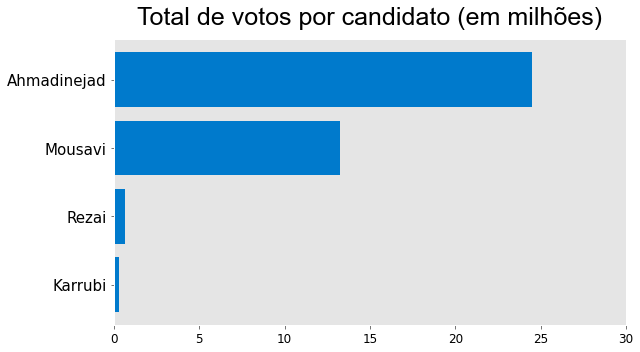

In [108]:
labels = votos_totais_por_candidato.sort_values("Total de votos")['Candidato']

values = votos_totais_por_candidato.sort_values("Total de votos")['Total de votos'] / 1000000

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (9, 5))

ax.barh(labels, values, color = '#007acc')

plt.yticks(size = 15, color = 'black')

plt.xticks(np.arange(0, max(values) + 10, 5), size = 12, color = 'black')

plt.title('Total de votos por candidato (em milhões)', pad = 15, fontsize = 25, **{'fontname':'Arial'})

plt.grid(False)

plt.tight_layout()

plt.show()

In [109]:
votot_ahmadinejad_mousavi = votos_totais_por_candidato.iloc[:2, :].reset_index().drop('index', 1)
#votot_ahmadinejad_mousavi
sum(votot_ahmadinejad_mousavi['Total de votos'])

37740539

### Gráfico dos votos nos dois primeiros candidatos

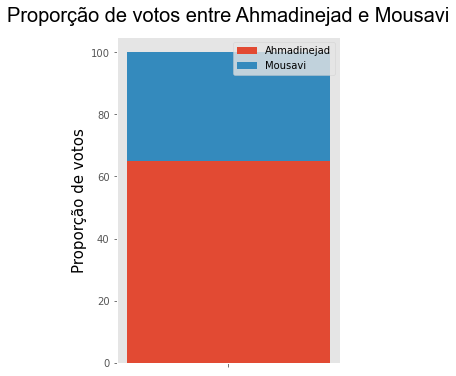

In [110]:
candidatos = ['']

prop_ah = votot_ahmadinejad_mousavi.loc[0, 'Total de votos'] * 100 / votot_ahmadinejad_mousavi['Total de votos'].sum()
prop_mou = votot_ahmadinejad_mousavi.loc[1, 'Total de votos'] * 100 / votot_ahmadinejad_mousavi['Total de votos'].sum()

figure, ay = plt.subplots(figsize = (4, 6))

plt.style.use('ggplot')

ay.bar(candidatos, prop_ah, label='Ahmadinejad')

ay.bar(candidatos, prop_mou, bottom = prop_ah, label='Mousavi')

ay.set_ylabel('Proporção de votos', color = 'black', size = 15)

ay.set_title('Proporção de votos entre Ahmadinejad e Mousavi', pad = 15, size = 20, **{'fontname':'Arial'})

ay.grid(None)

ay.legend()

plt.show()

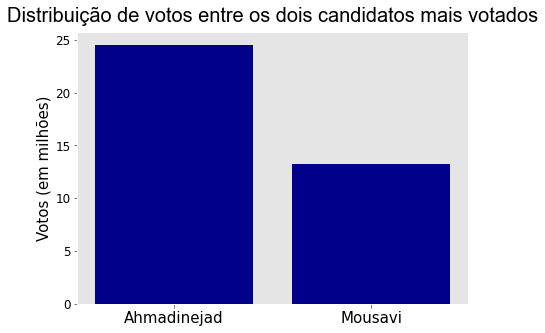

In [111]:
figure, az = plt.subplots(figsize = (7, 5))

plt.style.use('ggplot')

az.bar(votot_ahmadinejad_mousavi['Candidato'], votot_ahmadinejad_mousavi['Total de votos'] / 1000000, color = 'darkblue')

plt.title('Distribuição de votos entre os dois candidatos mais votados', fontsize = 20, pad = 10, **{'fontname':'Arial'})

plt.yticks(np.arange(0, max(votot_ahmadinejad_mousavi['Total de votos'] / 1000000) + 1, 5), size = 12, color = 'black')

plt.xticks(color = 'black', size = 15)

plt.ylabel('Votos (em milhões)', color = 'black', size = 15)

plt.grid(None)

plt.show()

## Quantidade de votos por província

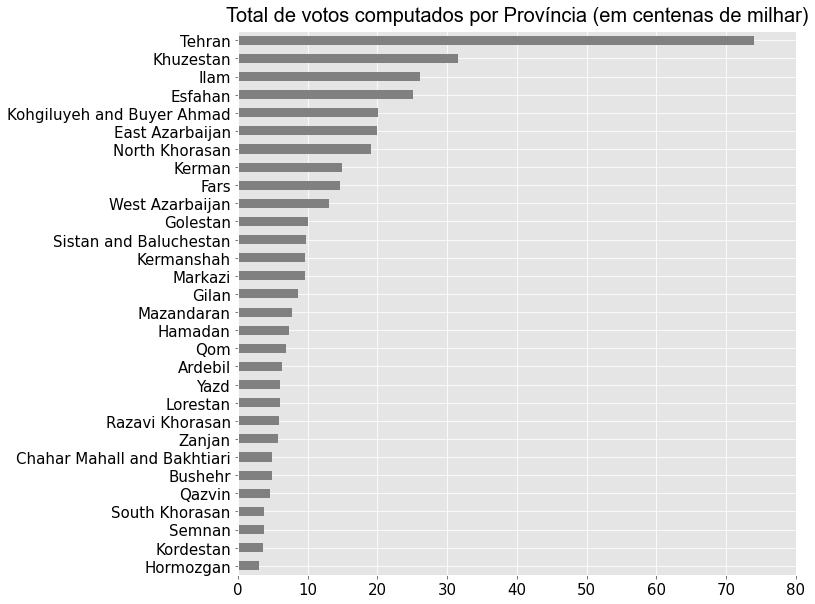

In [112]:
vals = iran.groupby('Provincia').sum()['Votos_legitimos'].sort_values(ascending=True) / 100000

fig, ab = plt.subplots(figsize = (10, 10))

plt.style.use('ggplot')

vals.plot.barh(color = 'gray')

ab.set_title('Total de votos computados por Província (em centenas de milhar)', size = 20, pad = 10, **{'fontname':'Arial'})

plt.yticks(size = 15, color = 'black')

plt.ylabel(None)

plt.xticks(np.arange(0, max(vals) + 10, 10), size = 12, color = 'black', fontsize = 15)

plt.show()

## QUANTIDADE DE VOTOS POR CANDIDATO POR PROVÍNCIA 

In [113]:
#vals_2 = iran.groupby('Provincia').sum()['Votos_legitimos']

states = sorted(iran['Provincia'].unique())

ahmad = np.array(iran.groupby('Provincia').sum()['Ahmadinejad'])

reza = np.array(iran.groupby('Provincia').sum()['Rezai'])

karr = np.array(iran.groupby('Provincia').sum()['Karrubi'])

mous = np.array(iran.groupby('Provincia').sum()['Mousavi'])

tot = np.array(iran.groupby('Provincia').sum()['Votos_totais'])

df = pd.DataFrame({'Provincias' : states,
                   'Ahmadinejad' : ahmad / 100000,
                   'Mousavi' : mous / 100000,
                   'Rezai' : reza / 100000,
                   'Karrubi' : karr / 100000,
                   'Total' : tot / 100000})

df = df.sort_values(by = 'Total', ascending = True)
df.head()

,Provincias,Ahmadinejad,Mousavi,Rezai,Karrubi,Total
9,Hormozgan,1.99654,0.96826,0.05221,0.07471,3.12667
15,Kordestan,2.53962,0.98937,0.08542,0.04274,3.68707
25,South Khorasan,2.85984,0.90363,0.03962,0.00928,3.83157
23,Semnan,2.95177,0.77754,0.04440,0.02147,3.83308
20,Qazvin,3.41104,1.13218,0.04129,0.02478,4.64001


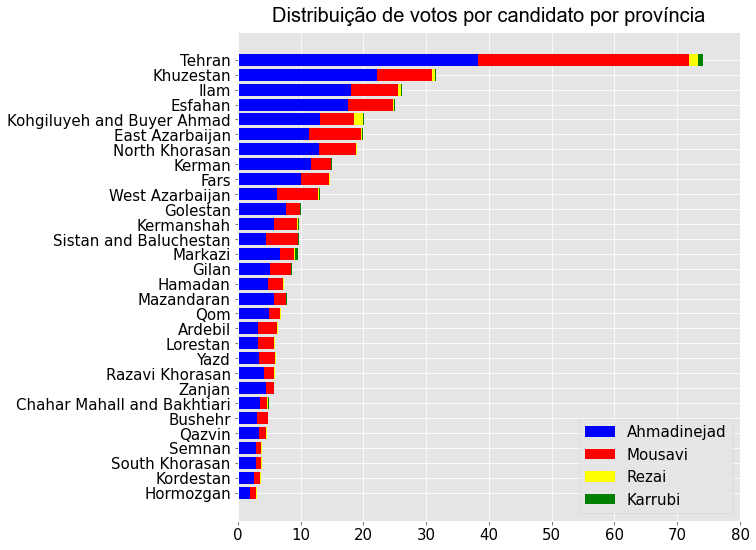

In [114]:
fig, ab = plt.subplots(figsize = (9, 9))

plt.style.use('ggplot')

plt.barh(df['Provincias'], df['Ahmadinejad'], color = 'blue')
plt.barh(df['Provincias'], df['Mousavi'], left = df['Ahmadinejad'], color = 'red')
plt.barh(df['Provincias'], df['Rezai'], left = df['Mousavi'] + df['Ahmadinejad'], color = 'yellow')
plt.barh(df['Provincias'], df['Karrubi'], left = df['Rezai'] + df['Mousavi'] + df['Ahmadinejad'], color = 'green')

plt.title('Distribuição de votos por candidato por província', size = 20, pad = 10, **{'fontname':'Arial'})

plt.yticks(color = 'black')

plt.yticks(size = 15, color = 'black')

plt.ylabel(None)

plt.xticks(np.arange(0, max(vals) + 10, 10), size = 12, color = 'black', fontsize = 15)

plt.legend(['Ahmadinejad', 'Mousavi', 'Rezai', 'Karrubi'], prop = {'size' : 15})

plt.show()

# GEOPANDAS

## Importação do pacote:

In [115]:
import geopandas as gpd

## Extração e limpeza dos dados:


In [117]:
url_territorio = "https://stacks.stanford.edu/file/druid:dv126wm3595/data.zip"
df_1 = gpd.read_file(url_territorio).iloc[1:,:].drop(['ID_0', 'ISO', 'NAME_0', 'ID_1', 
                                                      'HASC_1', 'CCN_1', 'CCA_1', 'TYPE_1', 
                                                      'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'], 
                                                      axis = 1).rename(columns = {'NAME_1' : 'Provincia'})

#Territorios_df_1 = sorted([i for i in df_1['Provincia']])

#Provincias_iran = sorted(iran['Provincia'].unique())

### Proporção de votos por província

In [118]:
# PROPORÇÃO DE VOTOS POR PROVÍNCIA:

df_2 = pd.DataFrame({'Provincia' : sorted(iran['Provincia'].unique()),
                     'Ahmadinejad / Mousavi' : ahmad / mous})

merged_dfs = pd.merge(df_1,df_2, on='Provincia')
merged_dfs

# Mousavi ganhou apenas nas províncias de Sistan and Baluchestan e West Azerbaijan

,Provincia,geometry,Ahmadinejad / Mousavi
0,Ardebil,"POLYGON ((48.03973 39.65592, 48.04565 39.65158...",1.076235
1,Bushehr,"MULTIPOLYGON (((52.67042 27.45958, 52.67042 27...",1.688726
2,Chahar Mahall and Bakhtiari,"POLYGON ((50.82116 32.66864, 50.82166 32.65881...",3.389080
3,East Azarbaijan,"POLYGON ((47.48034 39.13348, 47.49612 39.11452...",1.350003
4,Esfahan,"POLYGON ((51.89705 34.48372, 51.93306 34.46427...",2.487430
5,Fars,"POLYGON ((52.19606 31.56477, 52.20783 31.55495...",2.200440
6,Gilan,"POLYGON ((48.83885 38.44549, 48.87037 38.43744...",1.581343
7,Golestan,"POLYGON ((55.82281 38.10811, 55.82996 38.10497...",3.504758
8,Hamadan,"POLYGON ((48.20073 35.69976, 48.21349 35.68994...",1.995925
9,Hormozgan,"MULTIPOLYGON (((58.00042 25.65903, 58.00042 25...",2.061987


Text(0.5, 138.84889249866632, '')

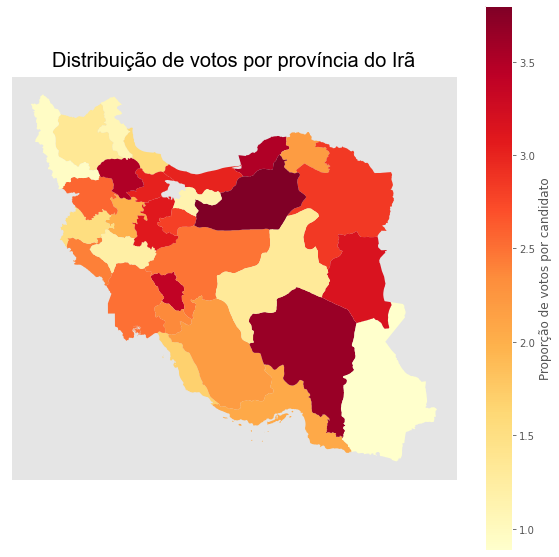

In [119]:
plt.style.use('ggplot')

merged_dfs.plot(column = 'Ahmadinejad / Mousavi',
           figsize = (10, 10),
           legend = True,
           legend_kwds = {'label': "Proporção de votos por candidato"},
           cmap = "YlOrRd")

plt.title('Distribuição de votos por província do Irã', size = 20, pad = 10, **{'fontname':'Arial'})

plt.grid(None)

plt.xticks([])

plt.yticks([])

plt.ylabel(None)

plt.xlabel(None)

# 2) ANÁLISE

## Função que toma o primeiro algarismo de uma série de números 

In [120]:
def primeiro_digito(df, coluna):
    """ A função leva dois parâmetros: df e coluna. Eles representam, respectivamente, o dataset
        e a coluna que se tem por objetivo analisar os primeiros dígitos.
        A função retorna o total de observações, uma lista contendo os primeiros dígitos e
        uma outra lista com a distribuição de observações por dígitos."""
    
    # Encontra-se o primeiro dígito dos números de votos
    data = [int(str(i)[:1]) for i in df[coluna]]
    
    # Lista com a quantidade de números iniciados com cada um dos 9 algarismos
    data_count = [data.count(i) for i in set(data)]
    
    # Soma da quantidade de observações
    total_de_observacoes = sum(data_count)
    
    # Porcentagem de votos que iniciam por cada dígito
    porcentagem_de_votos_por_digito = [(i * 100 / total_de_observacoes) for i in data_count]
    
    return total_de_observacoes, data_count, porcentagem_de_votos_por_digito

## Aplicando a função primeiro_digito ao total de votos válidos

In [121]:
total_de_observações, contagem_dados, porcentagens = primeiro_digito(iran, 'Votos_totais')

print(f'O total de observações foi de {total_de_observações}.')
print(f'A quantidade de observações iniciadas pelos 9 dígitos são, respectivamente: {contagem_dados}.')
print(f'Por fim, a proporção de cada dado iniciado por cada um dos dígitos é {[round(i) for i in porcentagens]}, em porcentagens.')

O total de observações foi de 366.
A quantidade de observações iniciadas pelos 9 dígitos são, respectivamente: [80, 74, 51, 46, 38, 20, 26, 21, 10].
Por fim, a proporção de cada dado iniciado por cada um dos dígitos é [22, 20, 14, 13, 10, 5, 7, 6, 3], em porcentagens.


In [122]:
print(f'O total de observações foi de {total_de_observações}, a lista contendo a quantidade dos primeiros dígitos é {contagem_dados} e a distribuição dessas é dado por {porcentagens}, em %.')

O total de observações foi de 366, a lista contendo a quantidade dos primeiros dígitos é [80, 74, 51, 46, 38, 20, 26, 21, 10] e a distribuição dessas é dado por [21.85792349726776, 20.218579234972676, 13.934426229508198, 12.568306010928962, 10.382513661202186, 5.46448087431694, 7.103825136612022, 5.737704918032787, 2.73224043715847], em %.


## LEI DE BENFORD

In [123]:
# P(d) = log10(1 + 1/d)
benford = [math.log10(1 + 1/number) for number in range(1, 10)]
benford

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829993,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

### Coeficientes esperados

In [124]:
# Para encontrar a frequência esperada, basta multiplicar os coeficientes da Lei de Benford pelo número total de observações
valores_esperados = [(p * total_de_observações) for p in benford]
valores_esperados

[110.17697841301712,
 64.44940081437933,
 45.72757759863777,
 35.46906476094865,
 28.980336053430683,
 24.50252500480444,
 21.225052593833343,
 18.72182321574155,
 16.747241545207103]

### Gráfico: Valores esperados de acordo com a distribuição da Lei do Primeiro Dígito vs Valores Observados:

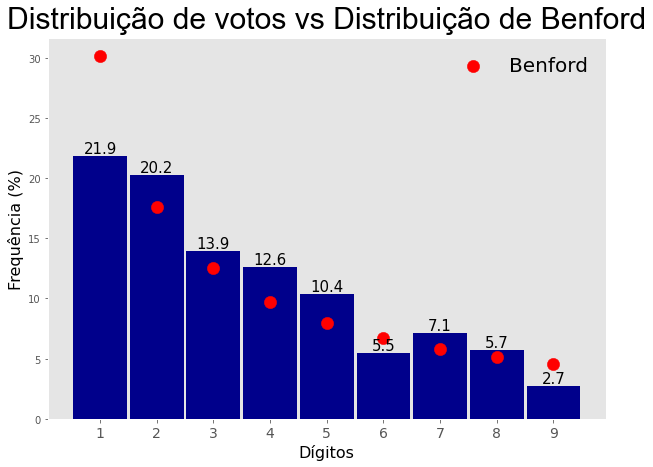

In [125]:
#1st_bar_chart
def bar_chart(data_pct):

    """Gráfico de barras com os valores observados vs os valores esperados."""

    fig, aw = plt.subplots(figsize = (10, 7))
    
    index = [i + 1 for i in range(len(data_pct))]  

    
    # Arrumando o gráfico esteticamente:
    plt.style.use('ggplot')
    
    plt.grid(None)
    
    aw.set_title('Distribuição de votos vs Distribuição de Benford', fontsize = 30, pad = 10, **{'fontname' : 'Arial'})

    aw.set_ylabel('Frequência (%)', fontsize = 16, color = 'black')
    
    aw.set_xlabel('Dígitos', fontsize = 16, color = 'black')

    aw.set_xticks(index)

    aw.set_xticklabels(index, fontsize = 14)

    rects = aw.bar(index, data_pct, width = 0.95, color = 'darkblue')


    # Colocando o a altura de cada barra acima dessa
    for rect in rects:
        height = rect.get_height()
        aw.text(rect.get_x() + rect.get_width() / 2, height, 
                '{:0.1f}'.format(height), ha = 'center', va = 'bottom', fontsize = 15)

    # Plotando os valores dados pela Lei de Benford como pontos: 
    aw.scatter(index, [i * 100 for i in benford], s = 150, c = 'red', zorder = 2, label = 'Benford')

    aw.legend(prop = {'size':20}, frameon = False)

    plt.show()

bar_chart(porcentagens)

## TESTE DE QUI-QUADRADO

In [127]:
def qui_quadrado(vals_obs, val_exp):
    """ A função toma dois parametros: """
    
    chi_square_stat = 0  # chi square test statistic
    for valor_observado, valor_esperado in zip(vals_obs, val_exp):
        chi_square_stat += ((valor_observado - valor_esperado) ** 2) / valor_esperado
    
    graus_de_liberdade = len(contagem_dados) - 1
    
    # Calculando o P-valor usando o método chi2.sf:
    p_valor = chi2.sf(chi_square_stat, graus_de_liberdade) 
    
    # Testando se o P-valor é suficientemente pequeno para demonstrar que não descartemos a ocorrência de uma fraude eleitoral:
    if p_valor > 0.05:
        print(f"O X² é {round(chi_square_stat, 2)} e o P-valor é de {round(p_valor, 5)}. Portanto, as eleições não apresentam sinais de fraude")
        return chi_square_stat, p_valor
    else:
        print(f"O X² é {round(chi_square_stat, 2)} e o P-valor é de {round(p_valor, 5)}. Portanto, as eleições apresentam sinais de fraude. Abaixo, temos o X² e o P-valor, respectivamente.")
        return chi_square_stat, p_valor
        
chi_square_stat = qui_quadrado(contagem_dados, valores_esperados)
chi_square_stat

O X² é 21.12 e o P-valor é de 0.00684. Portanto, as eleições apresentam sinais de fraude. Abaixo, temos o X² e o P-valor, respectivamente.


(21.119619903516657, 0.006836367404108023)